In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [3]:
# define functions
def LinearFunc(t, a, b):
    return a * t + b

def ChiSqrd(Data, Fit, Error):
    return sum( ((Data - Fit) / Error)**2 )

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( ((Data - Fit) / Error)**2 ) / (np.size(Data) - NumPrams - 2)

def GuessFunc(x, a, b, A, h):
    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

def GuessFunc2(x, A, c, b, h):
    return A*np.tanh((x-b)/c) + h

def WeightedAverageError(Err):
    return np.sqrt( 1/( sum( 1/(Err)**2 ) ) )

def WeightedAverage(Val, Err):
    return ( sum( Val/(Err)**2 ) )/( sum( 1/(Err)**2 ) )

## VO2
### Importing Data and Error Determination


S1 Error
266.90420627312227


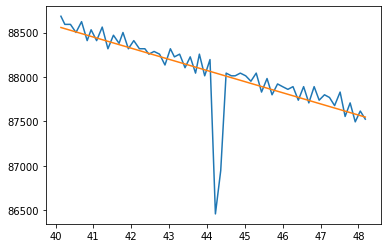


T1 Error
163.90926428467185
x error
0.6886814375405309


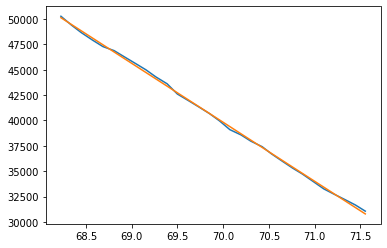


M1 Error
96.72827634348646


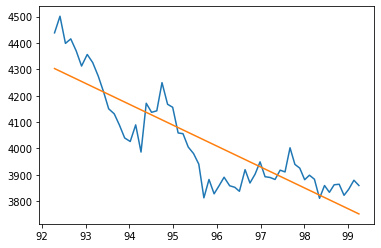


M2 Error
139.7374602246838


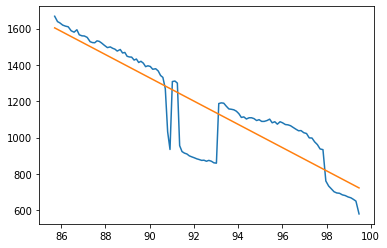


T2 Error
252.44677704190116
x error
0.2678068165592616


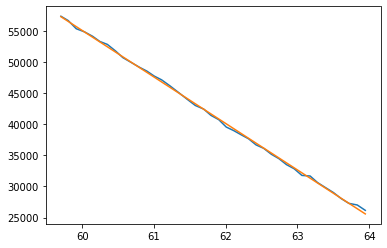


S2 Error
215.5616685589721


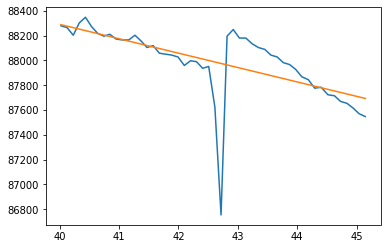

In [4]:
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/VO2_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col2'])

#Formatting Data
x = np.resize(x,(1205,1))
y = np.resize(y,(1205,1))

#y units are 10^x V ?  x=-8?  

TStartIndex = 106
TCutIndex = 579
TEndIndex = 1116

#Resizing and cutting
y = y * 1 * 10**6 # R=V_mes/I = V_mes * R_0 / V_0 = V_mes * 1 MOhm  10^6

xF = x[:,0]
yF = y[:,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = y[(TCutIndex+1):TEndIndex,0]

#6 different "sections" S-semiconducting, T-transition, M-metallic going up and down in temp
#errors different in each, approximate 'cut offs temps' between the sections used
ErrorArray1 = np.linspace(1,1,np.size(x1))
ErrorArray2 = np.linspace(1,1,np.size(x2))

#S1 Error
print("")
print("S1 Error")
Ex = x1[0:60]
Ey = y1[0:60]

BackgroundGuess = [-100, 100000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray1[0:150] = errorV * ErrorArray1[0:150]

S1RError = errorV
print(errorV)
plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()


#T1 Error
print("")
print("T1 Error")
Ex = x1[220:250]
Ey = y1[220:250]

BackgroundGuess = [-1000, 1000000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray1[150:320] = errorV * ErrorArray1[150:320]

T1RError = errorV
print(errorV)
print("x error")
#TErrorFromFit = -1 * errorV / BackParam[0]  Can be ignored
T1TempErrorFromResiduals = -4000 / BackParam[0]  #the residual plot devated ~4000 in the y, this converts to xerr
print(T1TempErrorFromResiduals)

plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()


#M1 Error
print("")
print("M1 Error")
Ex = x1[(np.size(x1)-60):np.size(x1)]
Ey = y1[(np.size(x1)-60):np.size(x1)]

BackgroundGuess = [-1000, 1000000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray1[320:np.size(ErrorArray1)] = errorV * ErrorArray1[320:np.size(ErrorArray1)]

M1RError = errorV
print(errorV)
plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()


#M2 Error
print("")
print("M2 Error")
Ex = x2[0:120]
Ey = y2[0:120]

BackgroundGuess = [-1000, 1000000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray2[0:250] = errorV * ErrorArray2[0:250]

M2RError = errorV
print(errorV)
plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()


#T2 Error
print("")
print("T2 Error")
Ex = x2[310:350]
Ey = y2[310:350]

BackgroundGuess = [-1000, 1000000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray2[250:390] = errorV * ErrorArray2[250:390]

T2RError = errorV
print(errorV)
print("x error")
#TErrorFromFit = -1 * errorV / BackParam[0]  #Can be ignored
T2TempErrorFromResiduals = -2000 / BackParam[0]  #the residual plot devated ~4000 in the y, this converts to xerr
print(T2TempErrorFromResiduals)

plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()


#S2 Error
print("")
print("S2 Error")
Ex = x2[(np.size(x2)-50):np.size(x2)]
Ey = y2[(np.size(x2)-50):np.size(x2)]

BackgroundGuess = [-100, 100000]
BackParam, BackParam_cov = curve_fit(LinearFunc, Ex, Ey, BackgroundGuess, maxfev=150000)

errorV = np.sqrt( sum( (Ey - LinearFunc(Ex, *BackParam))**2 ) / (np.size(Ex) - 2) )
ErrorArray2[390:np.size(ErrorArray2)] = errorV * ErrorArray2[390:np.size(ErrorArray2)]

S2RError = errorV
print(errorV)
plt.plot(Ex, Ey)
plt.plot(Ex, LinearFunc(Ex, *BackParam))
plt.show()

### Fitting, Plotting, and Critical and Coersive Temp Determination

TLow = 61.25767064045905 +/- 0.2678068165592616
THigh = 68.71138903197031 +/- 0.6886814375405309

TCrit = 64.98452983621468 +/- 0.3694599482381339
T* = 3.726859195755633 +/- 0.3694599482381339


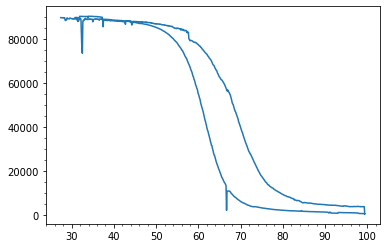

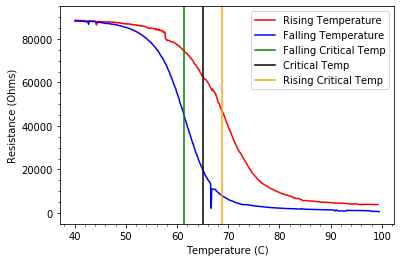


1: Reduced Chi Squared = 65010.99311739371
2: Reduced Chi Squared = 51606.40265575783



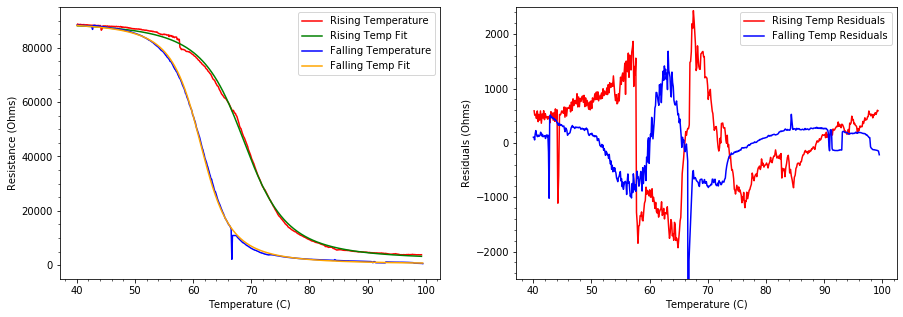

In [20]:
#def GuessFunc(x, a, b, A, h):
#    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

#########
GuessGuess1 = [5, 70, 10000, 100]
Param1, Param_cov1 = curve_fit(GuessFunc, x1, y1, GuessGuess1, maxfev=150000, sigma=ErrorArray1)

GuessGuess2 = [5, 70, 10000, 100]
Param2, Param_cov2 = curve_fit(GuessFunc, x2, y2, GuessGuess2, maxfev=150000, sigma=ErrorArray2)

TLow = Param2[1]
THigh = Param1[1]

TCrit = (TLow + THigh)/2
TCrit_Error = np.sqrt(T1TempErrorFromResiduals**2 + T2TempErrorFromResiduals**2) / 2

TCoer = (THigh - TLow)/2
TCoer_Error = TCrit_Error


print("TLow = "+ str(TLow) + " +/- " + str(T2TempErrorFromResiduals))
print("THigh = "+ str(THigh) + " +/- " + str(T1TempErrorFromResiduals))
print("")

print("TCrit = "+ str(TCrit) + " +/- " + str(TCrit_Error))
print("T* = "+ str(TCoer) + " +/- " + str(TCrit_Error))

#########

plt.plot(xF, yF)
plt.minorticks_on()
plt.show()

fig = plt.figure()
fig1 = fig.add_subplot(1,1,1)
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Resistance (Ohms)")
fig1.plot(x1, y1, label='Rising Temperature', color='red')
#fig1.plot(x1, GuessFunc(x1, *Param1))
fig1.plot(x2, y2, label='Falling Temperature', color='blue')
#fig1.plot(x2, GuessFunc(x2, *Param2))
fig1.plot([TLow, TLow],[-5000,95000], label='Falling Critical Temp', color='green')
fig1.plot([TCrit, TCrit],[-5000,95000], label='Critical Temp', color='black')
fig1.plot([THigh, THigh],[-5000,95000], label='Rising Critical Temp', color='orange')
fig1.set_ylim([-5000,95000])
fig1.minorticks_on()
fig1.legend();

fig.savefig('VO2Full.jpg', bbox_inches='tight', dpi=150)
plt.show()



print("")
RCS = RdChiSqrd(x1, GuessFunc(x1, *Param1), ErrorArray1, 4)
print("1: Reduced Chi Squared = " + str(RCS))
RCS = RdChiSqrd(x2, GuessFunc(x2, *Param2), ErrorArray2, 4)
print("2: Reduced Chi Squared = " + str(RCS))

print("")

fig = plt.figure(figsize=(15,5))
fig1 = fig.add_subplot(1,2,1)
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Resistance (Ohms)")
fig1.plot(x1, y1, label='Rising Temperature', color='red')
fig1.plot(x1, GuessFunc(x1, *Param1), label='Rising Temp Fit', color='green')
fig1.plot(x2, y2, label='Falling Temperature', color='blue')
fig1.plot(x2, GuessFunc(x2, *Param2), label='Falling Temp Fit', color='orange')
fig1.set_ylim([-5000,95000])
fig1.minorticks_on()
fig1.legend();

fig2 = fig.add_subplot(1,2,2)
fig2.set_xlabel("Temperature (C)")
fig2.set_ylabel("Residuals (Ohms)")
fig2.plot(x1, (y1 - GuessFunc(x1, *Param1)), label='Rising Temp Residuals', color='red')
#fig2.plot([THigh, THigh],[-2500,2500],label='Rising Critical Temperature', color='orange')
fig2.plot(x2, (y2 - GuessFunc(x2, *Param2)), label='Falling Temp Residuals', color='blue' )
#fig2.plot([TLow, TLow],[-2500,2500],label='Falling Critical Temperature', color='green')
fig2.set_ylim([-2500,2500])
fig2.minorticks_on()
fig2.legend();



fig.savefig('VO2Residuals.jpg', bbox_inches='tight', dpi=150)


plt.show()

### Absoulte Resistivites (Resistances), Resistance Ratio, and Percolation Temps

Avg Resistance of SC = 88039.48723459554 +/- 24.23861247515811
Resistivity of SC Phase = 35317.03730525844 +/- 17932.97271176472
Percolation Temp ~ 45.5 +/- 0.5

Avg Resistance of Metal = 3081.8798865638787 +/- 8.969744291441662
Resistivity of Metal Phase = 1236.2960115166575 +/- 627.7656696574768
Percolation Temp ~ 90.0 +/- 0.5


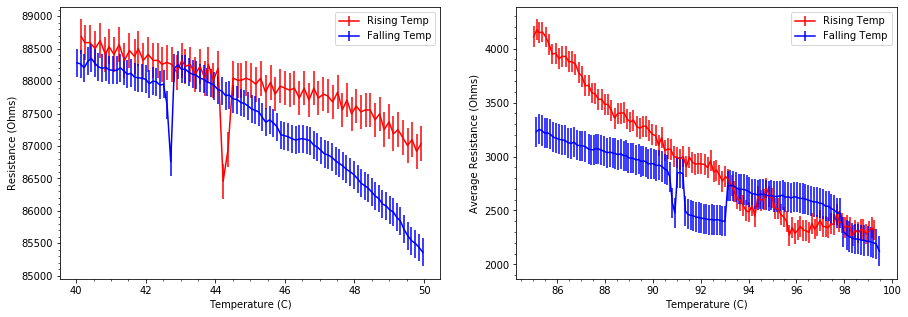

Ratio of Avg Semiconductor R to Avg Metal R = 28.566813268233687 +/- 0.08351424659255899
Ratio of Rising Semiconductor R to Rising Metal R = 21.308418187019292 +/- 0.05765742408188181
Ratio of Falling Semiconductor R to Falling Metal R = 87.08455483516389 +/- 1.330757293215626


In [6]:
#Semiconductor
radius = 0.0113
radiusError = 0.0005
length = 0.001
lengthError = 0.0005

TSCut = 45.5

R1Avg = (1/(np.size(y1[(np.where(x1 < TSCut)[0])]))) * sum(y1[(np.where(x1 < TSCut)[0])])
R1AvgError = (S1RError/np.sqrt(np.size(y1[(np.where(x1 < TSCut)[0])])))
R2Avg = (1/(np.size(y2[(np.where(x2 < TSCut)[0])]))) * sum(y2[(np.where(x2 < TSCut)[0])])
R2AvgError = (S2RError/np.sqrt(np.size(y2[(np.where(x2 < TSCut)[0])])))

RLowT = WeightedAverage(np.array([R1Avg, R2Avg]), np.array([R1AvgError, R2AvgError]))
RLowTError = WeightedAverageError(np.array([R1AvgError, R2AvgError]))

RisingSR = R1Avg
RisingSRError = R1AvgError
FallingSR = R2Avg
FallingSRError = R2AvgError

SCResistivity = np.pi * RLowT * radius**2 / length
SCResistivityError = np.sqrt( ((np.pi * radius**2 / length)**2 * RLowTError**2) + ((2 * np.pi * RLowT * radius / length)**2 * radiusError**2) + ((np.pi * RLowT * radius**2 / length**2)**2 * lengthError**2) )

print("Avg Resistance of SC = " + str(RLowT) + " +/- " + str(RLowTError))
print("Resistivity of SC Phase = " + str(SCResistivity) + " +/- " + str(SCResistivityError))
print("Percolation Temp ~ " + str(TSCut) + " +/- " + str(0.5))

fig = plt.figure(figsize=(15,5))
fig1 = fig.add_subplot(1,2,1)
fig1.errorbar(x1[(np.where(x1 < 50)[0])], y1[(np.where(x1 < 50)[0])], yerr=S1RError, label='Rising Temp', color='red')
fig1.errorbar(x2[(np.where(x2 < 50)[0])], y2[(np.where(x2 < 50)[0])], yerr=S2RError, label='Falling Temp', color='blue')
fig1.minorticks_on()
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Resistance (Ohms)")
fig1.legend();


#plt.plot(x1[(np.where(x1 < TSCut)[0])], y1[(np.where(x1 < TSCut)[0])])
#plt.plot(x2[(np.where(x2 < TSCut)[0])], y2[(np.where(x2 < TSCut)[0])])
#plt.minorticks_on()
#plt.show()


#Metal
print("")
TSCut = 90.0

R1Avg = (1/(np.size(y1[(np.where(x1 > TSCut)[0])]))) * sum(y1[(np.where(x1 > TSCut)[0])])
R1AvgError = (M1RError/np.sqrt(np.size(y1[(np.where(x1 > TSCut)[0])])))
R2Avg = (1/(np.size(y2[(np.where(x2 > TSCut)[0])]))) * sum(y2[(np.where(x2 > TSCut)[0])])
R2AvgError = (M2RError/np.sqrt(np.size(y2[(np.where(x2 > TSCut)[0])])))

RHighT = WeightedAverage(np.array([R1Avg, R2Avg]), np.array([R1AvgError, R2AvgError]))
RHighTError = WeightedAverageError(np.array([R1AvgError, R2AvgError]))

RisingMR = R1Avg
RisingMRError = R1AvgError
FallingMR = R2Avg
FallingMRError = R2AvgError

MResistivity = np.pi * RHighT * radius**2 / length
MResistivityError = np.sqrt( ((np.pi * radius**2 / length)**2 * RHighTError**2) + ((2 * np.pi * RHighT * radius / length)**2 * radiusError**2) + ((np.pi * RHighT * radius**2 / length**2)**2 * lengthError**2) )


print("Avg Resistance of Metal = " + str(RHighT) + " +/- " + str(RHighTError))
print("Resistivity of Metal Phase = " + str(MResistivity) + " +/- " + str(MResistivityError))
print("Percolation Temp ~ " + str(TSCut) + " +/- " + str(0.5))

fig2 = fig.add_subplot(1,2,2)
fig2.errorbar(x1[(np.where(x1 > 85)[0])], y1[(np.where(x1 > 85)[0])] - RHighT/2, yerr=M1RError, label='Rising Temp', color='red')
fig2.errorbar(x2[(np.where(x2 > 85)[0])], y2[(np.where(x2 > 85)[0])] + RHighT/2, yerr=M2RError, label='Falling Temp', color='blue')
fig2.minorticks_on()
fig2.set_xlabel("Temperature (C)")
fig2.set_ylabel("Average Resistance (Ohms)")
fig2.legend();

fig.savefig('VO2ZoomedSCandMetal.jpg', bbox_inches='tight', dpi=150)

plt.show()


#plt.plot(x1[(np.where(x1 > TSCut)[0])], y1[(np.where(x1 > TSCut)[0])])
#plt.plot(x2[(np.where(x2 > TSCut)[0])], y2[(np.where(x2 > TSCut)[0])])
#plt.minorticks_on()
#plt.show()


#Resistance Ratio
RRatio = RLowT/RHighT
RRatioError = np.sqrt( (RLowTError / RHighT)**2 + (RLowT * RHighTError / RHighT**2)**2 )

RisingRRatio = RisingSR/RisingMR
RisingRRatioError = np.sqrt( (RisingSRError / RisingMR)**2 + (RisingSR * RisingMRError / RisingMR**2)**2 )
FallingRRatio = FallingSR/FallingMR
FallingRRatioError = np.sqrt( (FallingSRError / FallingMR)**2 + (FallingSR * FallingMRError / FallingMR**2)**2 )



print("Ratio of Avg Semiconductor R to Avg Metal R = " + str(RRatio) + " +/- " + str(RRatioError))
print("Ratio of Rising Semiconductor R to Rising Metal R = " + str(RisingRRatio) + " +/- " + str(RisingRRatioError))
print("Ratio of Falling Semiconductor R to Falling Metal R = " + str(FallingRRatio) + " +/- " + str(FallingRRatioError))

### Semiconducting Gap Determination

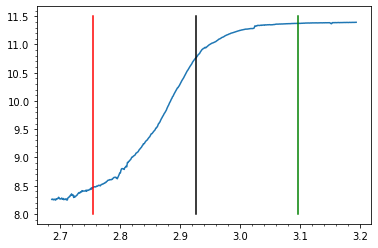

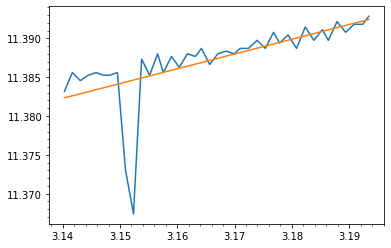

Semiconducting gap = 0.03273336835084282 +/- 0.00611865861686762


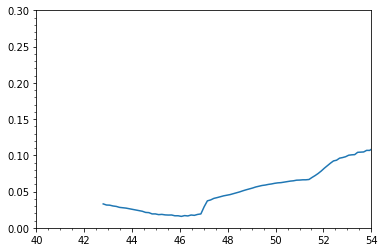

In [7]:
invx1 = 1/(x1+273)
logy1 = np.log(y1)
logy1Error = ErrorArray1 / y1

plt.plot(1000*invx1, logy1)
plt.plot([1000/(THigh+273), 1000/(THigh+273)],[8,11.5], color='k')
plt.plot([1000/(50+273), 1000/(50+273)],[8,11.5], color='g')
plt.plot([1000/(90+273), 1000/(90+273)],[8,11.5], color='r')
plt.minorticks_on()
plt.show()

Shortinvx1 = 1/(x1[(np.where(x1<45.5)[0])]+273)
Shortlogy1 = np.log(y1[(np.where(x1<45.5)[0])])
Shortlogy1Error = ErrorArray1[(np.where(x1<45.5)[0])] / y1[(np.where(x1<45.5)[0])]

Guess = [120000, 0]
Param, Param_cov = curve_fit(LinearFunc, Shortinvx1, Shortlogy1, Guess, maxfev=150000, sigma=Shortlogy1Error)

plt.plot(1000*Shortinvx1, Shortlogy1)
plt.plot(1000*Shortinvx1, LinearFunc(Shortinvx1, *Param))
plt.minorticks_on()
plt.show()

EG1 = 2*0.00008617*Param[0]
EG1Error = 2*0.00008617*np.sqrt(Param_cov[0,0])

print("Semiconducting gap = " + str(2*0.00008617*Param[0]) + " +/- " + str(2*0.00008617*np.sqrt(Param_cov[0,0])))

k = 0
j = 40
Beta = np.ones(np.size(invx1)-j)
Slope = np.ones(np.size(invx1)-j)

while k<(np.size(invx1)-j):
    invx1Mean = (1/j)*sum(invx1[k:(k+j)])
    logy1Mean = (1/j)*sum(logy1[k:(k+j)])

    aHat = (sum( (invx1[k:(k+j)]-invx1Mean)*(logy1[k:(k+j)]-logy1Mean) ))/(sum( (invx1[k:(k+j)]-invx1Mean)**2 ))
    #bHat = logy1Mean - aHat*invx1Mean
    Beta[k] = invx1Mean
    Slope[k] = aHat
    k = k+1
    

Beta1 = Beta
Slope1 = Slope

plt.plot(((1/Beta)-273), (2*0.00008617*Slope))
#plt.plot([THigh, THigh],[0,3.5])
plt.xlim([40,54])
plt.ylim([0,.3])
plt.minorticks_on()
plt.show()


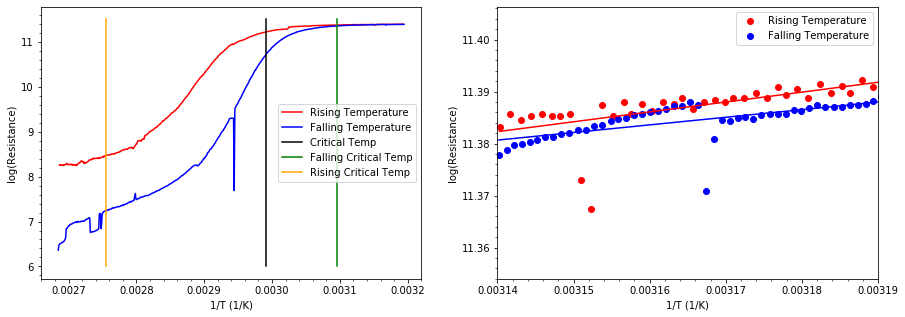

Semiconducting gap2 = 0.03273336835084282 +/- 0.00611865861686762


In [8]:
fig = plt.figure(figsize=(15,5))
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

invx2 = 1/(x2+273)
logy2 = np.log(y2)

fig1.plot(invx1, logy1, color='red', label='Rising Temperature')
fig1.plot(invx2, logy2, color='blue', label='Falling Temperature')
fig1.plot([1/(TLow+273), 1/(TLow+273)],[6,11.5], color='k', label='Critical Temp')
fig1.plot([1/(50+273), 1/(50+273)],[6,11.5], color='g', label='Falling Critical Temp')
fig1.plot([1/(90+273), 1/(90+273)],[6,11.5], color='orange', label='Rising Critical Temp')
fig1.minorticks_on()
fig1.set_xlabel("1/T (1/K)")
fig1.set_ylabel("log(Resistance)")
fig1.legend();



Shortinvx2 = 1/(x2[(np.where(x2<45.5)[0])]+273)
Shortlogy2 = np.log(y2[(np.where(x2<45.5)[0])])
Shortlogy2Error = ErrorArray2[(np.where(x2<45.5)[0])] / y2[(np.where(x2<45.5)[0])]

Guess = [120000, 0]
Param2, Param2_cov = curve_fit(LinearFunc, Shortinvx2, Shortlogy2, Guess, maxfev=150000, sigma=Shortlogy2Error)


fig2.scatter(Shortinvx1, Shortlogy1, color='red', label='Rising Temperature')
fig2.plot(Shortinvx1, LinearFunc(Shortinvx1, *Param), color='red')
fig2.scatter(Shortinvx2, Shortlogy2, color='blue', label='Falling Temperature')
fig2.plot(Shortinvx2, LinearFunc(Shortinvx2, *Param2), color='blue')
fig2.minorticks_on()
fig2.set_xlabel("1/T (1/K)")
fig2.set_ylabel("log(Resistance)")
fig2.set_xlim([0.00314, 0.00319])
fig2.legend();

fig.savefig('VO2GapPlots.jpg', bbox_inches='tight', dpi=150)
plt.show()

EG2 = 2*0.00008617*Param2[0]
EG2Error = 2*0.00008617*np.sqrt(Param2_cov[0,0])

print("Semiconducting gap2 = " + str(2*0.00008617*Param[0]) + " +/- " + str(2*0.00008617*np.sqrt(Param_cov[0,0])))


k = 0
j = 40
Beta = np.ones(np.size(invx2)-j)
Slope = np.ones(np.size(invx2)-j)

while k<(np.size(invx2)-j):
    invx2Mean = (1/j)*sum(invx2[k:(k+j)])
    logy2Mean = (1/j)*sum(logy2[k:(k+j)])

    aHat = (sum( (invx2[k:(k+j)]-invx2Mean)*(logy2[k:(k+j)]-logy2Mean) ))/(sum( (invx2[k:(k+j)]-invx2Mean)**2 ))
    #bHat = logy1Mean - aHat*invx1Mean
    Beta[k] = invx2Mean
    Slope[k] = aHat
    k = k+1
    

    



    
#fig1.plot(((1/Beta)-273), (2*0.00008617*Slope))
#fig1.plot(((1/Beta1)-273), (2*0.00008617*Slope1))
#plt.plot([THigh, THigh],[0,3.5])
#plt.plot([TLow, TLow],[0,6])
#fig1.xlim([40,54])
#fig1.ylim([0,.2])
#fig1.minorticks_on()


In [9]:
print(str(WeightedAverage(np.array([EG1,EG2]),np.array([EG1Error,EG2Error]))) + " +/- " + str(WeightedAverageError(np.array([EG1Error,EG2Error]))))

0.027151310453312358 +/- 0.0031005590229708163


### Alternate (worse) Fitting to tanh

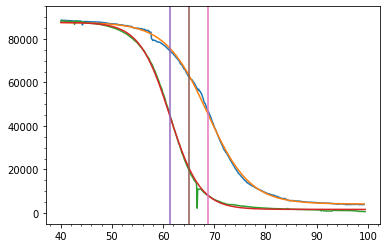

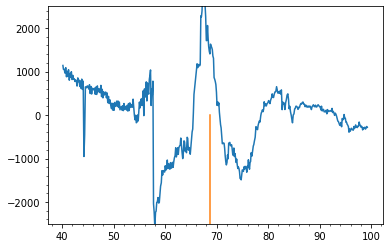

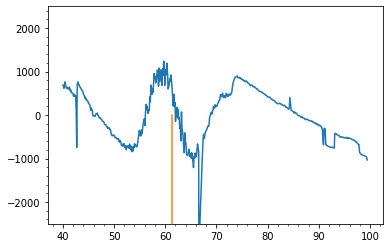


1: Reduced Chi Squared = 65012.735130531364
2: Reduced Chi Squared = 51600.39319129642
65.00532323202842
0.024113525799610135
3.681977220798398


In [10]:
#def GuessFunc2(x, A, c, b, h):
#    return A*np.tanh((x-b)/c) + h

#########
GuessGuess1 = [-45000, 8, 70, 50000]
Param1, Param_cov1 = curve_fit(GuessFunc2, x1, y1, GuessGuess1, maxfev=150000, sigma=ErrorArray1)

GuessGuess2 = [-50000, 10, 70, 50000]
Param2, Param_cov2 = curve_fit(GuessFunc2, x2, y2, GuessGuess2, maxfev=150000, sigma=ErrorArray2)

TLow = Param2[2]
THigh = Param1[2]

TCrit = (TLow + THigh)/2
TCoer = (THigh - TLow)/2
TCrit_Error = np.sqrt(Param_cov1[1,1] + Param_cov2[1,1]) / 2


#########

#plt.plot(xF, yF)
#plt.minorticks_on()
#plt.show()

plt.plot(x1, y1)
plt.plot(x1, GuessFunc2(x1, *Param1))
plt.plot(x2, y2)
plt.plot(x2, GuessFunc2(x2, *Param2))
plt.plot([TLow, TLow],[-5000,95000])
plt.plot([TCrit, TCrit],[-5000,95000])
plt.plot([THigh, THigh],[-5000,95000])
plt.ylim([-5000,95000])
plt.minorticks_on()
plt.show()

plt.plot(x1, (y1 - GuessFunc2(x1, *Param1)) )
plt.plot([THigh, THigh],[-2500,0])
plt.ylim([-2500,2500])
plt.minorticks_on()
plt.show()

plt.plot(x2, (y2 - GuessFunc2(x2, *Param2)) )
plt.plot([TLow, TLow],[-2500,0])
plt.ylim([-2500,2500])
plt.minorticks_on()
plt.show()


print("")
RCS = RdChiSqrd(x1, GuessFunc2(x1, *Param1), ErrorArray1, 4)
print("1: Reduced Chi Squared = " + str(RCS))
RCS = RdChiSqrd(x2, GuessFunc2(x2, *Param2), ErrorArray2, 4)
print("2: Reduced Chi Squared = " + str(RCS))


#print(TLow)
#print(THigh)
print(TCrit)
print(TCrit_Error)
print(TCoer)